# Import libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import plotly.express as px
import plotly.graph_objects as go 

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.metrics import r2_score
from sklearn.pipeline import Pipeline

In [ ]:
# When you interact with this notebook remove this comment fot interactive graph
import plotly.io as pio
# pio.renderers.default = 'svg'

In [3]:
from sklearn import set_config
set_config(display='diagram')

# Create a dataset for polynomial  (degree=2)

In [4]:
# y = 0.8(x^2)  + 0.9x + 2

X = 6 * np.random.rand(200, 1) - 3
y =( 0.8 * (X**2)) +( 0.9 * X) + 2 + np.random.rand(200, 1)

In [10]:
# see the data what we create
fig = px.scatter(
    x=X.ravel(),
    y= y.ravel(),
)

fig.show()

# Train test split

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [12]:
# apply linear regression
lr = LinearRegression()

In [13]:
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
# predict
y_pred = lr.predict(X_test)
r2_score(y_test, y_pred)

0.11095427446069062

-  this is very accuracy 
-  why  ?
-  see graph you understand

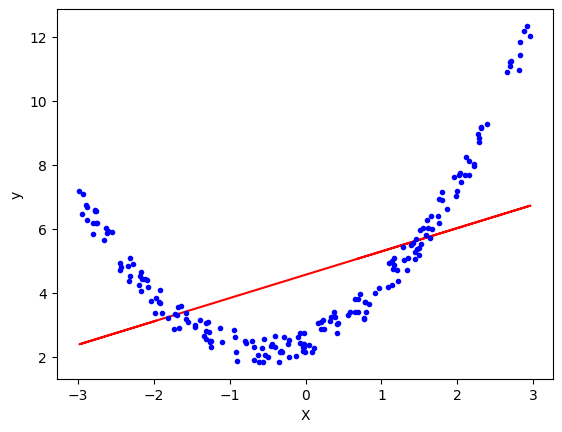

In [20]:
plt.plot(X_train,lr.predict(X_train),color='r')
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("y")
plt.show()

# Applying polynomial with degree 2

In [39]:
poly = PolynomialFeatures(degree=2, include_bias=True)


In [40]:
# learn the parameters
X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

In [41]:
print(X_train_trans.shape, X_test_trans.shape)

(160, 3) (40, 3)


In [57]:
# let's see what poly do with our data
print("This is only X means our actual data point.") 
print(f"Before applying the poly : {X_train[0]} \n")

print("This is x^0 + X^1 + X^2")
print(f"After applying the poly :  {X_train_trans[0]}")

This is only X means our actual data point.
Before applying the poly : [0.68521806] 

This is x^0 + X^1 + X^2
After applying the poly :  [1.         0.68521806 0.4695238 ]


# Now apply the algorithm after poly function applied

In [43]:
lr = LinearRegression()
lr.fit(X_train_trans, y_train)

LinearRegression()

In [44]:
y_pred = lr.predict(X_test_trans)
y_pred.shape

(40, 1)

In [45]:
r2_score(y_test, y_pred)

0.9902292187950676

In [46]:
# now the see the m and b
print(lr.coef_, lr.intercept_)

[[0.         0.89598419 0.8088605 ]] [2.49311495]


In [ ]:
X_new=np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)

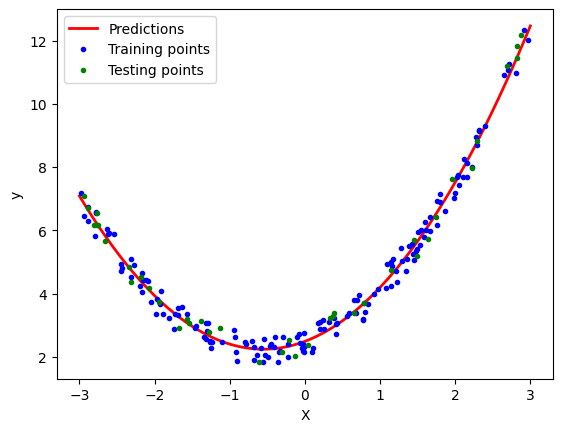

In [48]:
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Make function

In [50]:
def polynomial_regression(degree):
    
    # Create a new points
    X_new=np.linspace(-3, 3, 100).reshape(100, 1)
    X_new_poly = poly.transform(X_new)

    # Apply Algorithm
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig,'r', label="Degree " + str(degree), linewidth=2)

    # Plot the Graph
    plt.plot(X_train, y_train, "b.", linewidth=3)
    plt.plot(X_test, y_test, "g.", linewidth=3)
    plt.legend(loc="upper left")
    plt.xlabel("X")
    plt.ylabel("y")
    plt.axis([-3, 3, 0, 10])
    plt.show()

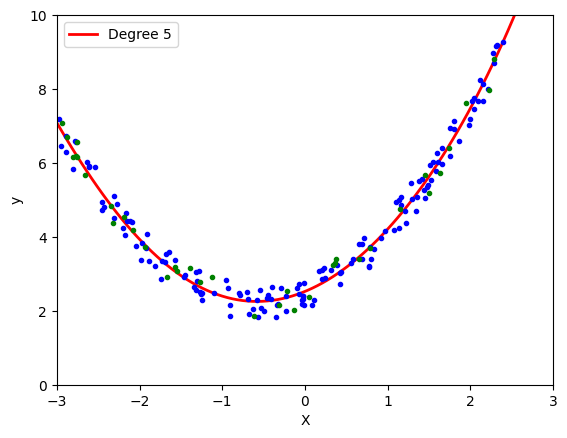

In [53]:
polynomial_regression(5)

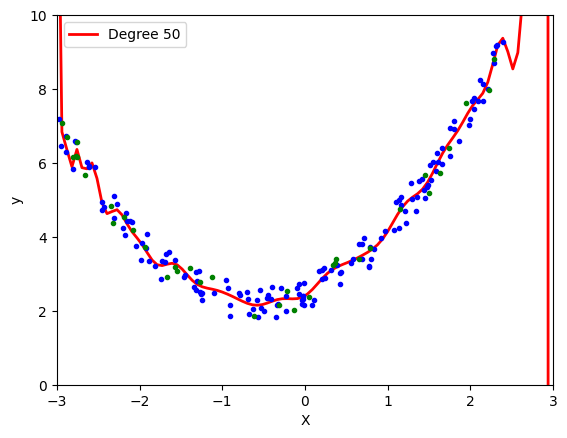

In [54]:
polynomial_regression(50)

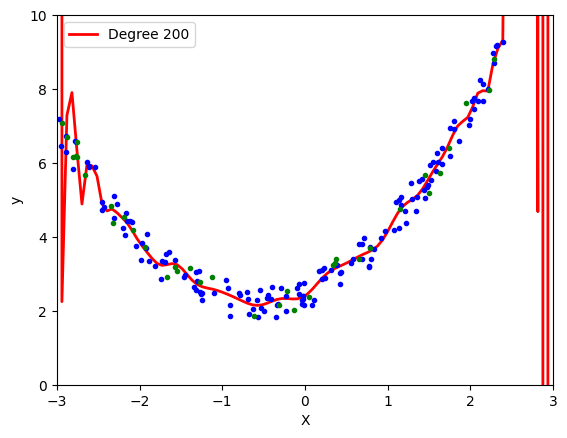

In [ ]:
# over fitting 
polynomial_regression(200)

In [ ]:
# power of the function
poly.powers_

array([[0],
       [1],
       [2]])

# Apply the Gradient Descent

c:\Users\Rudra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



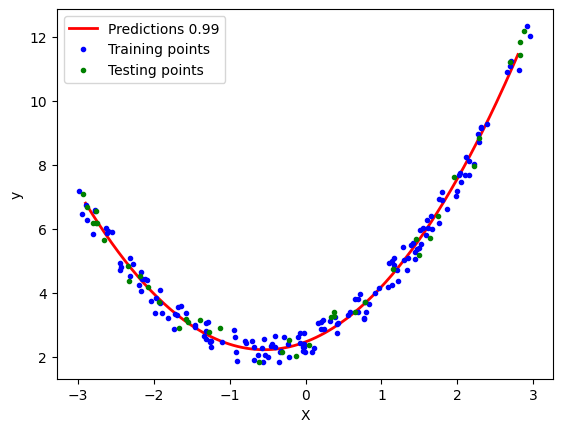

In [66]:
poly = PolynomialFeatures(degree=2)

X_train_trans = poly.fit_transform(X_train)
X_test_trans = poly.transform(X_test)

sgd = SGDRegressor(max_iter=100)
sgd.fit(X_train_trans,y_train)

X_new=np.linspace(-2.9, 2.8, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = sgd.predict(X_new_poly)

y_pred = sgd.predict(X_test_trans)

plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions " + str(round(r2_score(y_test,y_pred),2)))
plt.plot(X_train, y_train, "b.",label='Training points')
plt.plot(X_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

# Now Create the 3D data

In [68]:
# 3D polynomial regression
x = 7 * np.random.rand(100, 1) - 2.8
y = 7 * np.random.rand(100, 1) - 2.8

z = x**2 + y**2 + 0.2*x + 0.2*y + 0.1*x*y +2 + np.random.randn(100, 1)
# z = x^2 + y^2 + 0.2x + 0.2y + 0.1xy + 2

## See the data

In [71]:
# import the data then plot
df = px.data.iris()

fig = px.scatter_3d(
    df, x=x.ravel(),
    y=y.ravel(),
    z=z.ravel())
fig.show()

# Before poly apply the algorithm

In [ ]:
# Apply the model
lr = LinearRegression()
lr.fit(np.array([x,y]).reshape(100,2),z)

# input columns
x_input = np.linspace(x.min(), x.max(), 10)
y_input = np.linspace(y.min(), y.max(), 10)
xGrid, yGrid = np.meshgrid(x_input,y_input)

final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

# Prediction plane
z_final = lr.predict(final).reshape(10,10)



In [74]:
fig = px.scatter_3d(
    df, x=x.ravel(),
    y=y.ravel(),
    z=z.ravel()
)

fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final ))

fig.show()

# Apply the poly

In [75]:
X_multi = np.array([x,y]).reshape(100,2)
X_multi.shape

(100, 2)

In [78]:
poly = PolynomialFeatures(degree=30)
X_multi_trans = poly.fit_transform(X_multi)
X_multi_trans.shape

(100, 496)

In [79]:
X_multi.shape

(100, 2)

In [ ]:
# how many input -> x, y (two)
poly.n_features_in_

2

In [ ]:
# how may output based on the degree
poly.n_output_features_

496

In [ ]:
# degree 
poly.powers_

array([[ 0,  0],
       [ 1,  0],
       [ 0,  1],
       [ 2,  0],
       [ 1,  1],
       [ 0,  2],
       [ 3,  0],
       [ 2,  1],
       [ 1,  2],
       [ 0,  3],
       [ 4,  0],
       [ 3,  1],
       [ 2,  2],
       [ 1,  3],
       [ 0,  4],
       [ 5,  0],
       [ 4,  1],
       [ 3,  2],
       [ 2,  3],
       [ 1,  4],
       [ 0,  5],
       [ 6,  0],
       [ 5,  1],
       [ 4,  2],
       [ 3,  3],
       [ 2,  4],
       [ 1,  5],
       [ 0,  6],
       [ 7,  0],
       [ 6,  1],
       [ 5,  2],
       [ 4,  3],
       [ 3,  4],
       [ 2,  5],
       [ 1,  6],
       [ 0,  7],
       [ 8,  0],
       [ 7,  1],
       [ 6,  2],
       [ 5,  3],
       [ 4,  4],
       [ 3,  5],
       [ 2,  6],
       [ 1,  7],
       [ 0,  8],
       [ 9,  0],
       [ 8,  1],
       [ 7,  2],
       [ 6,  3],
       [ 5,  4],
       [ 4,  5],
       [ 3,  6],
       [ 2,  7],
       [ 1,  8],
       [ 0,  9],
       [10,  0],
       [ 9,  1],
       [ 8,  2],
       [ 7,  3

## now apply the linear algorithm

In [80]:
lr = LinearRegression()
lr.fit(X_multi_trans, z)

LinearRegression()

In [81]:
X_test_multi = poly.transform(final)
X_test_multi

array([[ 1.00000000e+00, -2.70518438e+00, -2.74140971e+00, ...,
         1.34172725e+13,  1.35969442e+13,  1.37790219e+13],
       [ 1.00000000e+00, -1.94481387e+00, -2.74140971e+00, ...,
         6.93468251e+12,  9.77512876e+12,  1.37790219e+13],
       [ 1.00000000e+00, -1.18444336e+00, -2.74140971e+00, ...,
         2.57216657e+12,  5.95331333e+12,  1.37790219e+13],
       ...,
       [ 1.00000000e+00,  2.61740919e+00,  4.08253339e+00, ...,
         8.74532845e+17,  1.36406243e+18,  2.12761170e+18],
       [ 1.00000000e+00,  3.37777970e+00,  4.08253339e+00, ...,
         1.45644980e+18,  1.76032941e+18,  2.12761170e+18],
       [ 1.00000000e+00,  4.13815021e+00,  4.08253339e+00, ...,
         2.18597596e+18,  2.15659640e+18,  2.12761170e+18]],
      shape=(100, 496))

In [82]:
# predict based on the z
z_final = lr.predict(X_multi_trans).reshape(10,10)

# Now next see the degree polynomial of plane  

In [86]:
fig = px.scatter_3d(
    x=x.ravel(),
    y=y.ravel(),
    z=z.ravel()
)

fig.add_trace(
    go.Surface(x = x_input, y = y_input, z =z_final)
)

fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))

fig.show()

In [ ]:
def plot_n_degree_graph(degree=10):

    lr = LinearRegression()

    # Apply the model
    lr = LinearRegression()
    lr.fit(np.array([x,y]).reshape(100,2),z)

    # input columns
    x_input = np.linspace(x.min(), x.max(), 10)
    y_input = np.linspace(y.min(), y.max(), 10)
    xGrid, yGrid = np.meshgrid(x_input,y_input)

    # Make a mesh
    final = np.vstack((xGrid.ravel().reshape(1,100),yGrid.ravel().reshape(1,100))).T

    # Prediction plane
    z_final = lr.predict(final).reshape(10,10)

    X_multi = np.array([x,y]).reshape(100,2)

    # apply the polynomial 
    poly = PolynomialFeatures(degree=degree)
    X_multi_trans = poly.fit_transform(X_multi)

    lr.fit(X_multi_trans, z)
    X_test_multi = poly.transform(final)
    z_final = lr.predict(X_multi_trans).reshape(10,10)

    # plot the graph
    fig = px.scatter_3d(x=x.ravel(), y=y.ravel(), z=z.ravel())
    fig.add_trace(go.Surface(x = x_input, y = y_input, z =z_final))
    fig.update_layout(scene = dict(zaxis = dict(range=[0,35])))
    fig.show()

In [94]:
plot_n_degree_graph(20)

(100, 231) (100, 2)
